# Lab 1: Decision Trees

Parand Mohri

In [149]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

1) Diabetes Data

In [150]:
data = pd.read_csv('/Users/macbook/Downloads/diabetes.csv')
Y = data['class']
X = data.drop(['class'],axis=1)

Deviding the data into test and train and training one-level decision tree:

In [151]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy',
           max_depth = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
  test_size=0.34, random_state=10)
clf = clf.fit(X_train, Y_train)

Calculating the acuuracy of the Train data:

In [152]:
Yp = clf.predict(X_train)
acc = accuracy_score(Y_train, Yp)
print(acc)

0.7648221343873518


Calculating the acuuracy of the Test data:

In [153]:
Yp = clf.predict(X_test)
acc = accuracy_score(Y_test, Yp)
print(acc)

0.7213740458015268


With one-level decition tree we got the above accurecies for train and test data. As you can see train data has better accurecy than test data and that is not a surprise because the tree was made by train data so its more accurate for that data.

Deviding the data into test and train and training multi-level decision tree:

In [154]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy',
           max_depth = None)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
  test_size=0.34, random_state=10)
clf = clf.fit(X_train, Y_train)


Calculating the acuuracy of the Train data:

In [155]:
Yp = clf.predict(X_train)
acc = accuracy_score(Y_train, Yp)
print(acc)

1.0


Calculating the acuuracy of the Test data:

In [156]:
Yp = clf.predict(X_test)
acc = accuracy_score(Y_test, Yp)
print(acc)

0.7251908396946565


With multi-level decition tree we got the above accurecies for train and test data. the accuracy for training data is 1 because the tree doesnt have any limits for max depth so it make new branch for every data if needed so it make the right decition for all the data in train data, this is not true for test data because it can be some cases in the test data that the decition tree doesnt know about. 

Putting min_samples_leaf to the size of the datasets and deviding the data into test and train and training the decision tree:

In [157]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy',
           max_depth = None, min_samples_leaf = 768)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
  test_size=0.34, random_state=10)
clf = clf.fit(X_train, Y_train)

Calculating the acuuracy of the Train data:

In [158]:
Yp = clf.predict(X_train)
acc = accuracy_score(Y_train, Yp)
print(acc)

0.6561264822134387


Calculating the acuuracy of the Test data:

In [159]:
Yp = clf.predict(X_test)
acc = accuracy_score(Y_test, Yp)
print(acc)

0.6412213740458015


With multi-level decition tree with min_samples_leaf equal to the size of the datasets we got the above accurecies for train and test data. The accurecies here are less than what we have for multi-level and one-level decitiontrees, the reason is that we are stopping when the leaf nodes get less than 768 training instances and that gonna leave us with only the root node becaue that is the size of our dataset. so here our knowledge about test and training data is not that different and we can even have higher accurecy for our test data than train data as you can see it happend here as well.  

Plot the accuracy rates based on the training set and hold-out validation for min_samples_leaf from 1 to the size of the datasets with step of 5: 
Here im generating 50 trees with different test and train datas and making the graph with avarage data 

In [195]:
def accuracy(X_train, X_test, Y_train, Y_test):
    test =[]
    train = []
    for i in range(1,768,5):
        clf = tree.DecisionTreeClassifier(criterion = 'entropy',
               max_depth = None, min_samples_leaf = i)
        clf = clf.fit(X_train, Y_train)
        Yp_test = clf.predict(X_test)
        Yp_train = clf.predict(X_train)
        test.append(accuracy_score(Y_test, Yp_test))
        train.append(accuracy_score(Y_train, Yp_train))
    return test , train

acTest = [0] * round(768/5)
acTrain = [0] * round(768/5)
for i in range(50):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
          test_size=0.34)
    acTest = np.add(acTest, accuracy(X_train, X_test, Y_train, Y_test)[0])
    acTrain =np.add(acTrain, accuracy(X_train, X_test, Y_train, Y_test)[1])
acTest = [x / 50 for x in acTest]
acTrain = [x / 50 for x in acTrain]

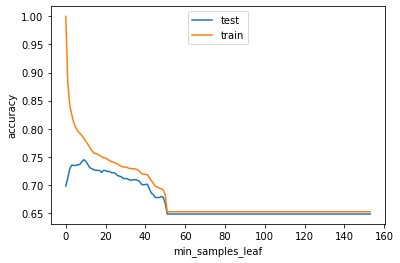

In [197]:
plt.plot(acTest,label = 'test')
plt.plot(acTrain,label = 'train')
plt.ylabel('accuracy')
plt.xlabel('min_samples_leaf')
plt.legend(loc ='upper center')
plt.show()

this is the resulting graph. It is really make sence because as we start our min-sample-leaf is low and we have a multi-level tree so its going to prodict the train data much better than test data but as min-sample-leaf grow they get closer and closer together and after some time we see that the accuracy doesnt change for neither of them. and we can see the overfitting of training data. 

2) Glass Data

In [14]:
data = pd.read_csv('/Users/macbook/Downloads/glass.csv')
Y = data['class']
X = data.drop(['class'],axis=1)

Deviding the data into test and train and training one-level decision tree:

In [15]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy',
           max_depth = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
  test_size=0.34, random_state=10)
clf = clf.fit(X_train, Y_train)

Calculating the acuuracy of the Train data:

In [16]:
Yp = clf.predict(X_train)
acc = accuracy_score(Y_train, Yp)
print(acc)

0.46099290780141844


Calculating the acuuracy of the Test data:

In [17]:
Yp = clf.predict(X_test)
acc = accuracy_score(Y_test, Yp)
print(acc)

0.4246575342465753


With one-level decition tree we got the above accurecies for train and test data. As you can see train data has better accurecy than test data and that is not a surprise because the tree was made by train data so its more accurate for that data.

Deviding the data into test and train and training multi-level decision tree:

In [18]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy',
           max_depth = None)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
  test_size=0.70, random_state=10)
clf = clf.fit(X_train, Y_train)

Calculating the acuuracy of the Train data:

In [19]:
Yp = clf.predict(X_train)
acc = accuracy_score(Y_train, Yp)
print(acc)

1.0


Calculating the acuuracy of the Test data:

In [20]:
Yp = clf.predict(X_test)
acc = accuracy_score(Y_test, Yp)
print(acc)

0.54


With multi-level decition tree we got the above accurecies for train and test data. the accuracy for training data is 1 because the tree doesnt have any limits for max depth so it make new branch for every data if needed so it make the right decition for all the data in train data, this is not true for test data because it can be some cases in the test data that the decition tree doesnt know about. 

Putting min_samples_leaf to the size of the datasets and deviding the data into test and train and training the decision tree:

In [21]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy',
           max_depth = None,min_samples_leaf = 214)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
  test_size=0.34, random_state=10)
clf = clf.fit(X_train, Y_train)

Calculating the acuuracy of the Train data:

In [22]:
Yp = clf.predict(X_train)
acc = accuracy_score(Y_train, Yp)
print(acc)

0.3546099290780142


Calculating the acuuracy of the Test data:

In [23]:
Yp = clf.predict(X_test)
acc = accuracy_score(Y_test, Yp)
print(acc)

0.3561643835616438


With multi-level decition tree with min_samples_leaf equal to the size of the datasets we got the above accurecies for train and test data. The accurecies here are less than what we have for multi-level and one-level decitiontrees, the reason is that we are stopping when the leaf nodes get less than 214 training instances and that gonna leave us with only the root node becaue that is the size of our dataset. so here our knowledge about test and training data is not that different and we can even have higher accurecy for our test data than train data as you can see it happend here as well. 

Plot the accuracy rates based on the training set and hold-out validation for min_samples_leaf from 1 to the size of the datasets with step of 5:
Here im generating 50 trees with different test and train datas and making the graph with avarage data 

In [202]:
def accuracy(X_train, X_test, Y_train, Y_test):
    test =[]
    train = []
    for i in range(1,214,5):
        clf = tree.DecisionTreeClassifier(criterion = 'entropy',
               max_depth = None, min_samples_leaf = i)
        clf = clf.fit(X_train, Y_train)
        Yp_test = clf.predict(X_test)
        Yp_train = clf.predict(X_train)
        test.append(accuracy_score(Y_test, Yp_test))
        train.append(accuracy_score(Y_train, Yp_train))
    return test , train

acTest = [0] * round(214/5)
acTrain = [0] * round(214/5)
for i in range(50):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
          test_size=0.34)
    acTest = np.add(acTest, accuracy(X_train, X_test, Y_train, Y_test)[0])
    acTrain =np.add(acTrain, accuracy(X_train, X_test, Y_train, Y_test)[1])
acTest = [x / 50 for x in acTest]
acTrain = [x / 50 for x in acTrain]

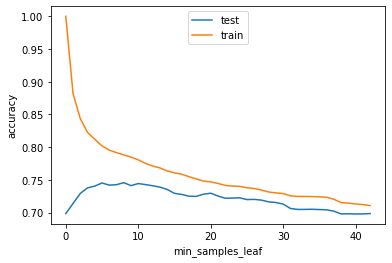

In [203]:
plt.plot(acTest,label = 'test')
plt.plot(acTrain,label = 'train')
plt.ylabel('accuracy')
plt.xlabel('min_samples_leaf')
plt.legend(loc ='upper center')
plt.show()

this is the resulting graph. It is really make sence because as we start our min-sample-leaf is low and we have a multi-level tree so its going to prodict the train data much better than test data but as min-sample-leaf grow they get closer and closer together. and we can see the overfitting of training data. 